# Lending Club Case Study - Exploratory Data Analysis

##### Group Members: 
1. Sahil Bajaj
2. Rajkumar Lakkimsetty

### Assignment Brief:

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
# Reading the loan dataset
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [3]:
# Inspecting the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.shape

(39717, 111)

In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

In [7]:
# summarising number of missing values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# percentage of missing values in each column
miss_val = round(100*(loan.isnull().sum()/len(loan.id)), 2)
print(miss_val)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [9]:
# Checking columns with more than 50% of missing values
col_miss_val = list(miss_val[miss_val >= 50].index)
len(col_miss_val)

57

In [10]:
# Dropping columns with more than 50% of missing values
loan = loan.drop(col_miss_val,axis=1)
loan.shape

(39717, 54)

In [11]:
# summarise number of missing values
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [12]:
# let's have a look at a few entries in the desc column
loan.loc[:, ['desc']].head()

,desc
0,Borrower added on 12/22/11 > I need to upgra...
1,Borrower added on 12/22/11 > I plan to use t...
2,NaN
3,Borrower added on 12/21/11 > to pay for prop...
4,Borrower added on 12/21/11 > I plan on combi...


In [13]:
#let's remove the desc column as it is not relevant for the analysis.
loan = loan.drop('desc',axis=1)

In [14]:
# summarise number of missing values again
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [15]:
# display only those columns that have % of missing values > 0
round(loan.isnull().sum()/len(loan)*100, 2).loc[lambda x : x > 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [16]:
#Checking the number of unique values in above columns
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


Columns emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies and tax_liens are clearly contain Categorical values.

In [17]:
# Lets take a look at these values
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [18]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [19]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [20]:
loan.tax_liens.unique()

array([ 0., nan])

In [21]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [22]:
# By observing we can drop collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens columns as these only contain 0 or null values.
loan = loan.drop(columns=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis=1)

In [23]:
loan.shape

(39717, 50)

In [24]:
# Checking again the missing % of values > 0
round(loan.isnull().sum()/len(loan)*100, 2).loc[lambda x : x > 0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [25]:
# Still there are some null values present in above columns, so lets remove the rows with null/Nan values from the above columns.
loan.dropna(subset=['emp_title','emp_length','title','revol_util','last_pymnt_d','last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)

In [26]:
loan.shape

(36433, 50)

In [27]:
# summarise number of missing values again
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_

As seen above we have cleaned the missing values from the required columns.
As per provided data dictionary file, we can take look at these 50 columns with better understanding.
There are coumns with are redundant and derived from other columns or only have single or unique values which doesn't contribute to our analysis.


In [28]:
# Lets drop these columns from loan dataframe as these columns are not relevant for our analysis
loan = loan.drop(columns=['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',], axis=1)

In [29]:
loan.shape

(36433, 38)

In [30]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36433 non-null  int64  
 1   term                     36433 non-null  object 
 2   int_rate                 36433 non-null  object 
 3   installment              36433 non-null  float64
 4   grade                    36433 non-null  object 
 5   sub_grade                36433 non-null  object 
 6   emp_title                36433 non-null  object 
 7   emp_length               36433 non-null  object 
 8   home_ownership           36433 non-null  object 
 9   annual_inc               36433 non-null  float64
 10  verification_status      36433 non-null  object 
 11  issue_d                  36433 non-null  object 
 12  loan_status              36433 non-null  object 
 13  purpose                  36433 non-null  object 
 14  title                 

In [31]:
#the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.
cust_behav_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

print(cust_behav_var)

['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']


In [32]:
# let's now remove the behaviour variables from analysis
loan = loan.drop(cust_behav_var, axis=1)

let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [33]:
loan.shape

(36433, 18)

In [34]:
loan['loan_status'] = loan['loan_status'].astype('category')
loan['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [35]:
# filtering only fully paid or charged-off
loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan['loan_status'].value_counts()

0    30424
1     4943
Name: loan_status, dtype: int64

In [36]:
# Coverting int_rate into float data type
loan['int_rate'] = loan.int_rate.str.replace('%','').astype(float)

In [37]:
# Coverting emp_length into float data type
loan['emp_length'] = loan.emp_length.str.replace('years','').str.replace('year','').str.replace('+','').str.replace('< 1','0.5').astype(float)

## Data Analysis

### Univariate Analysis

In [38]:
# Lets check the overall default rate
round(np.mean(loan['loan_status']), 2)

0.14

The overall default rate is about 14%.

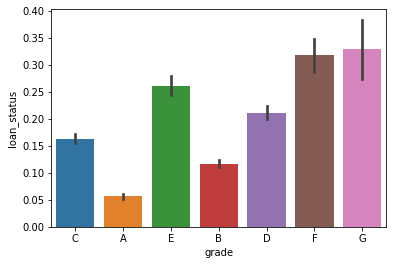

In [39]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=loan)
plt.show()

In [40]:
# lets define a function to plot loan_status across categorical variables
def plot_loan(loan_var):
    sns.barplot(x=loan_var, y='loan_status', data=loan)
    plt.show()

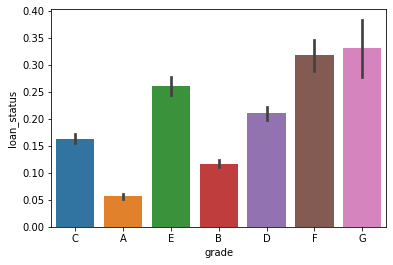

In [41]:
# compare default rates across grade of loan
plot_loan('grade')

As per the observation, the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the risk of the loan.

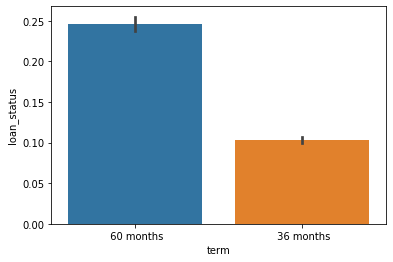

In [42]:
# term: 60 months loans default more than 36 months loans
plot_loan('term')

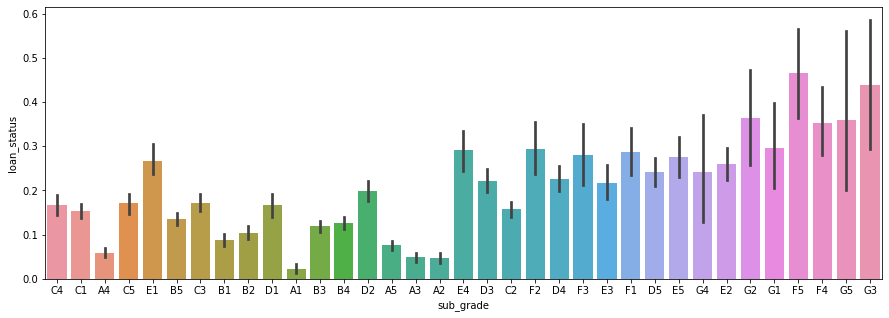

In [43]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(15, 5))
plot_loan('sub_grade')

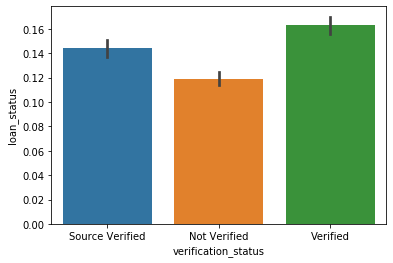

In [44]:
# verification_status: surprisingly, verified loans default more than not verified
plot_loan('verification_status')

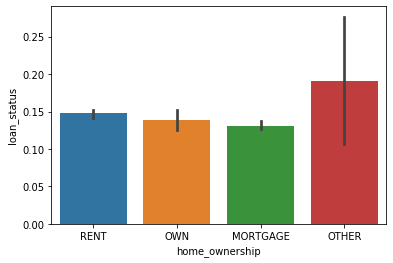

In [45]:
# home ownership: not a great discriminator
plot_loan('home_ownership')

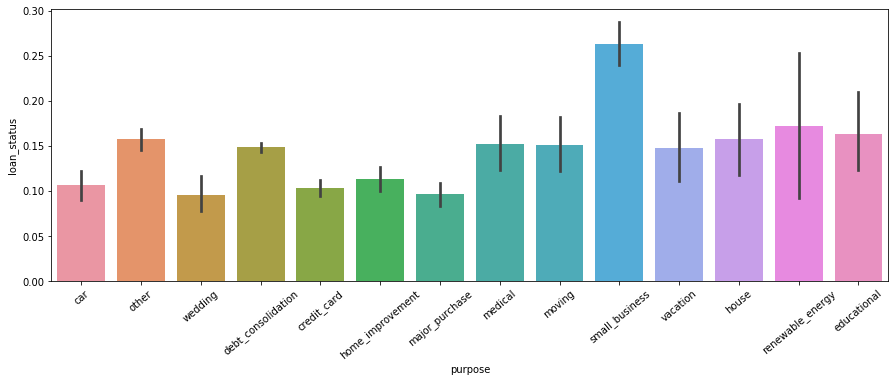

In [46]:
# purpose: small business loans default the most, then renewable energy and education
plt.figure(figsize=(15, 5))
# Rotating the labels on X-axis to avoid overlapping
plt.xticks(rotation=40) 
plot_loan('purpose')

In [47]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [48]:
# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

In [49]:
# let's first observe the number of loans granted across years
loan.groupby('year').year.count()

year
2007        6
2008     1053
2009     4423
2010    10795
2011    19090
Name: year, dtype: int64

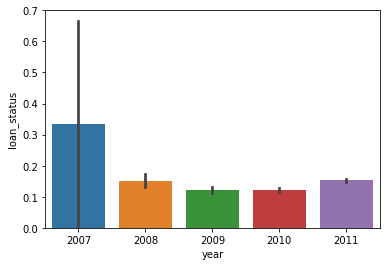

In [50]:
plot_loan('year')

In [51]:
# number of loans across months
loan.groupby('month').month.count()

month
1     2048
2     2020
3     2395
4     2669
5     2745
6     2977
7     3115
8     3188
9     3276
10    3436
11    3678
12    3820
Name: month, dtype: int64

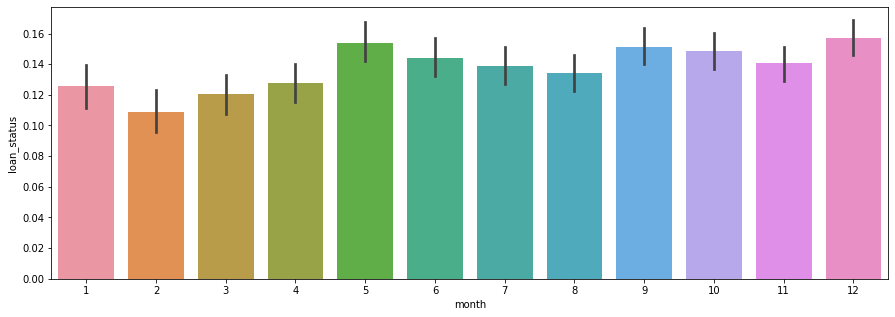

In [52]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(15, 5))
plot_loan('month')

As per the observation, December month is the month with most default rate.

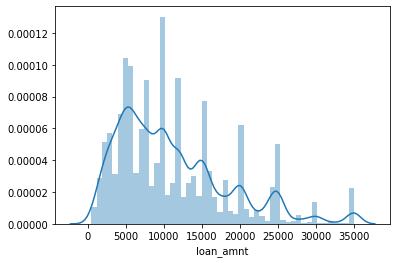

In [53]:
# loan amount: the median loan amount is around 10,000
sns.distplot(loan['loan_amnt'])
plt.show()

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [54]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))

In [55]:
loan['loan_amnt'].value_counts()

medium       19068
high          7147
low           6611
very high     2541
Name: loan_amnt, dtype: int64

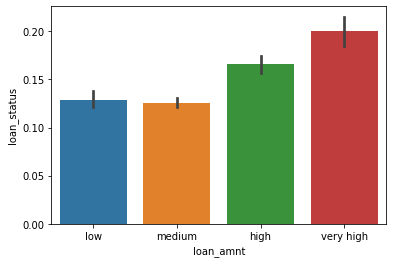

In [56]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_loan('loan_amnt')

In [57]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate(x))

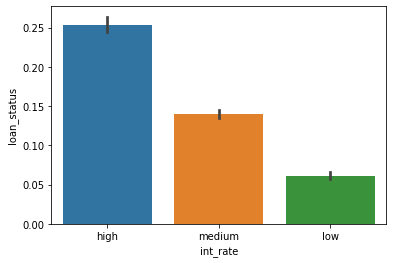

In [58]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
plot_loan('int_rate')

In [59]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti(x))

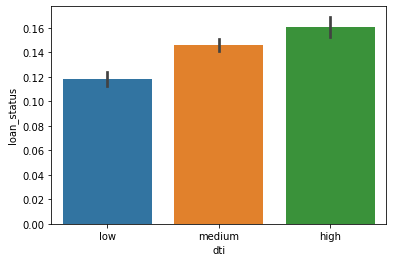

In [60]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_loan('dti')

In [61]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment'] = loan['installment'].apply(lambda x: installment(x))

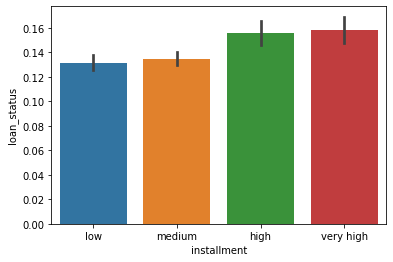

In [62]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_loan('installment')

In [63]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

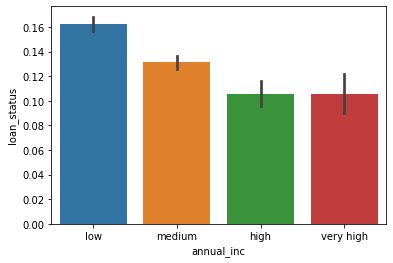

In [64]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_loan('annual_inc')

### Power Law

Do some of these variables exhibit the power law? Let's see.

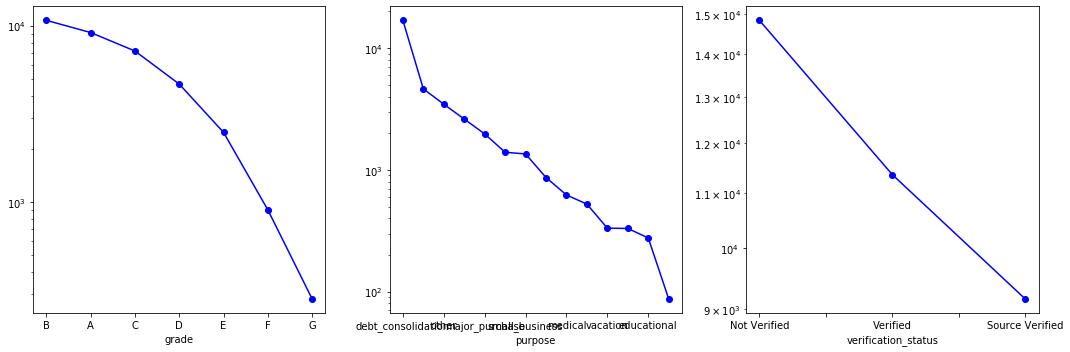

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
loan.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 2)
loan.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 3)
loan.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

purpose and verification_status follow the power law

### Bivariate Analysis

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.

Let's again have a look at the default rates across the purpose of the loan.

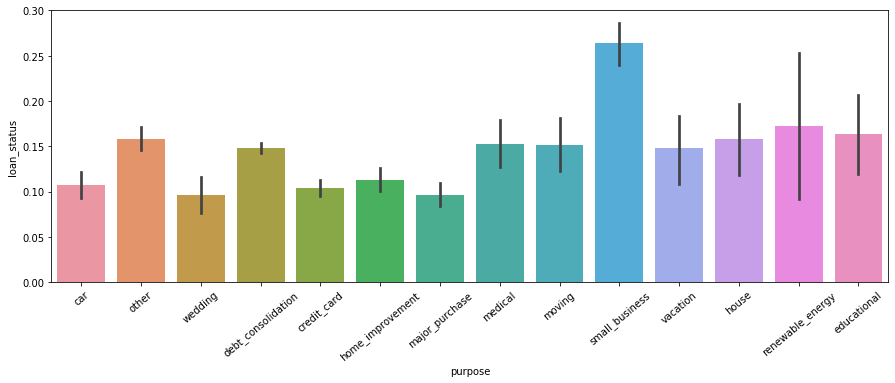

In [66]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(15, 5))
plt.xticks(rotation=40)
plot_loan('purpose')

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

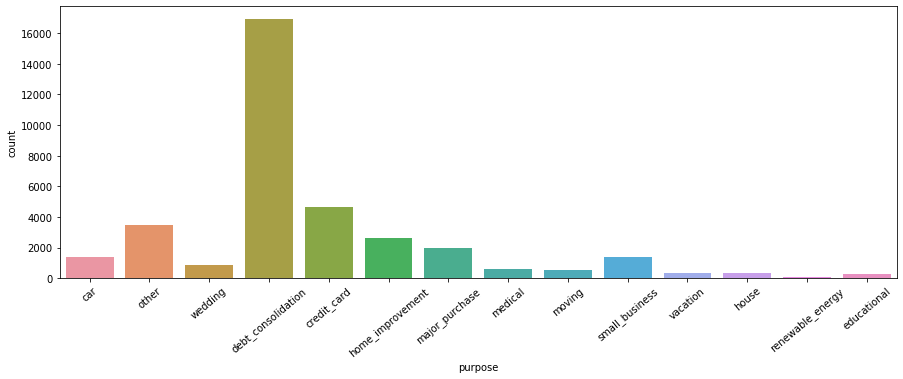

In [67]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(15, 5))
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=loan)
plt.show()

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [68]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan = loan[loan['purpose'].isin(main_purposes)]
loan['purpose'].value_counts()

debt_consolidation    16911
credit_card            4626
home_improvement       2614
major_purchase         1973
Name: purpose, dtype: int64

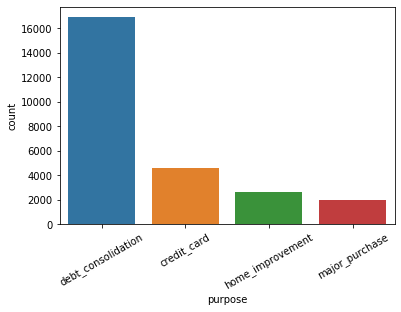

In [69]:
# plotting number of loans by purpose 
sns.countplot(x=loan['purpose'])
plt.xticks(rotation=30)
plt.show()

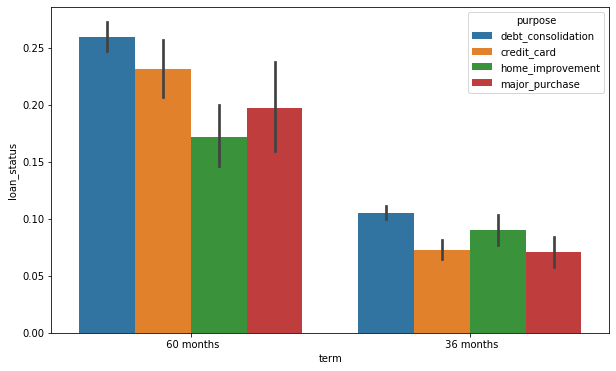

In [70]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan)
plt.show()

In [71]:
# lets write a function which takes a categorical variable and plots the default rate

def plot_seg(loan_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=loan_var, y='loan_status', hue='purpose', data=loan)
    plt.show()

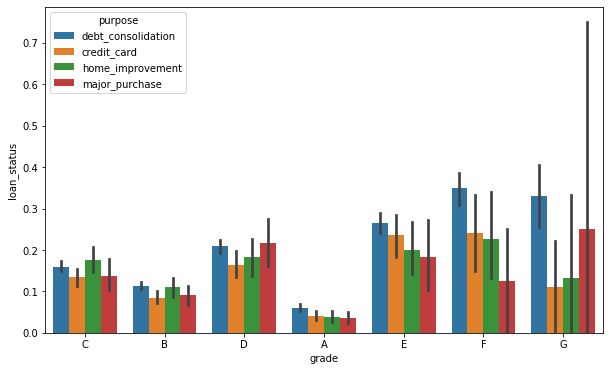

In [72]:
# grade of loan
plot_seg('grade')

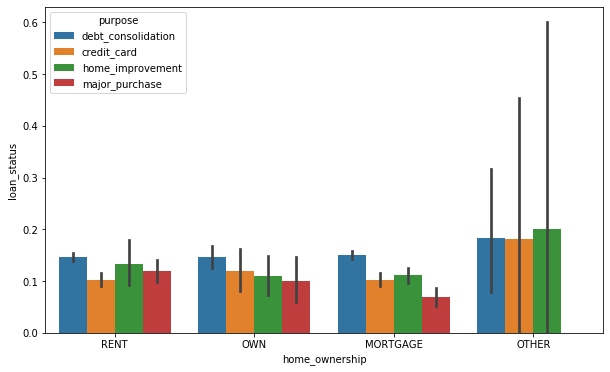

In [73]:
# home ownership
plot_seg('home_ownership')

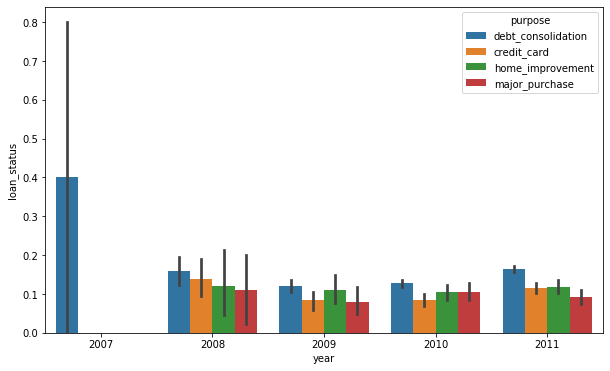

In [74]:
# year
plot_seg('year')

In [75]:
# binning the emp_length variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan['emp_length'] = loan['emp_length'].apply(lambda x: emp_length(x))

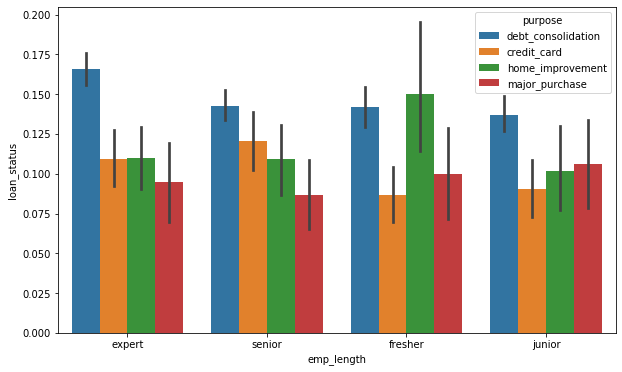

In [76]:
# emp_length
plot_seg('emp_length')

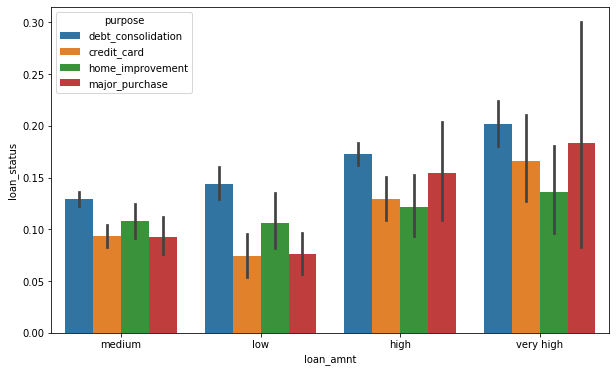

In [77]:
# loan_amnt: same trend across loan purposes
plot_seg('loan_amnt')

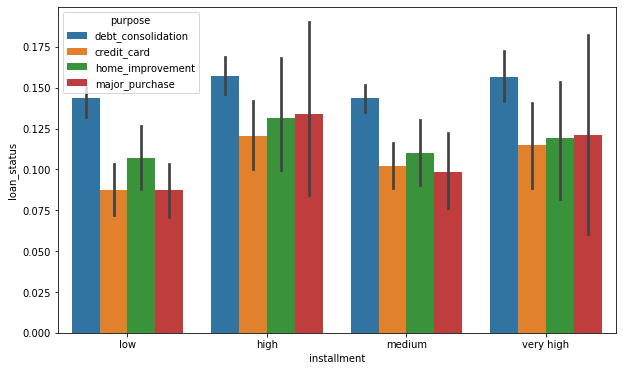

In [78]:
# installment
plot_seg('installment')

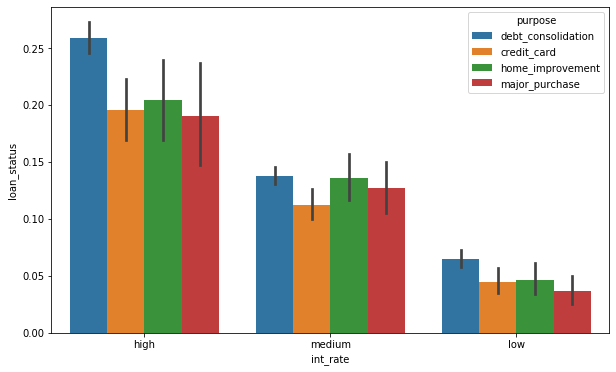

In [79]:
# interest rate
plot_seg('int_rate')

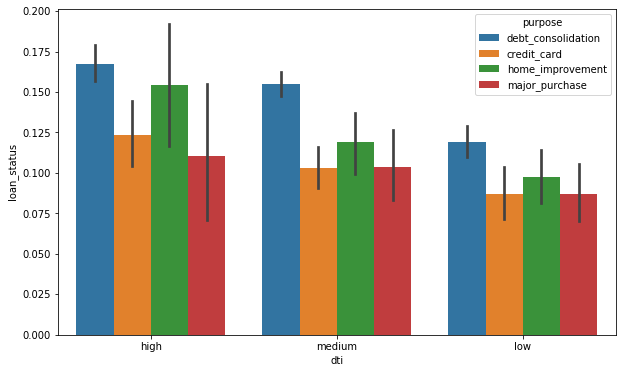

In [80]:
# debt to income ratio
plot_seg('dti')

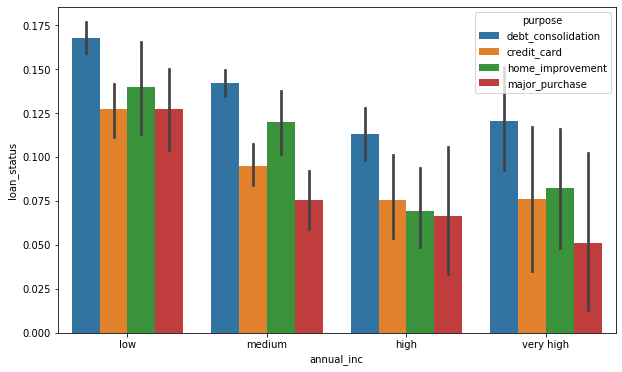

In [81]:
# annual income
plot_seg('annual_inc')

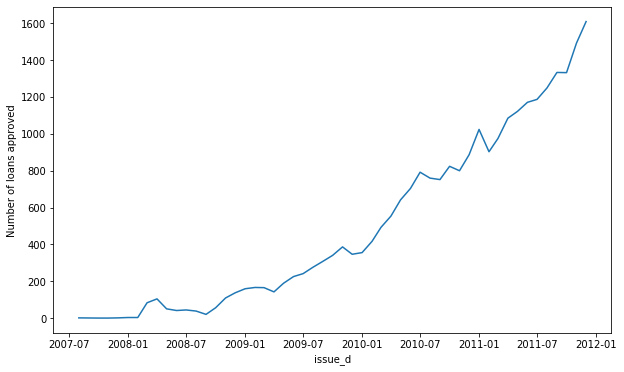

In [82]:
# Number of approved loans over the years
loan_s=loan.groupby('issue_d').count().reset_index().loc[:,['issue_d','loan_amnt']]
fig = plt.figure(figsize=(10, 6))
sns.lineplot(x='issue_d', y='loan_amnt', data=loan_s)
plt.ylabel('Number of loans approved')
plt.show()

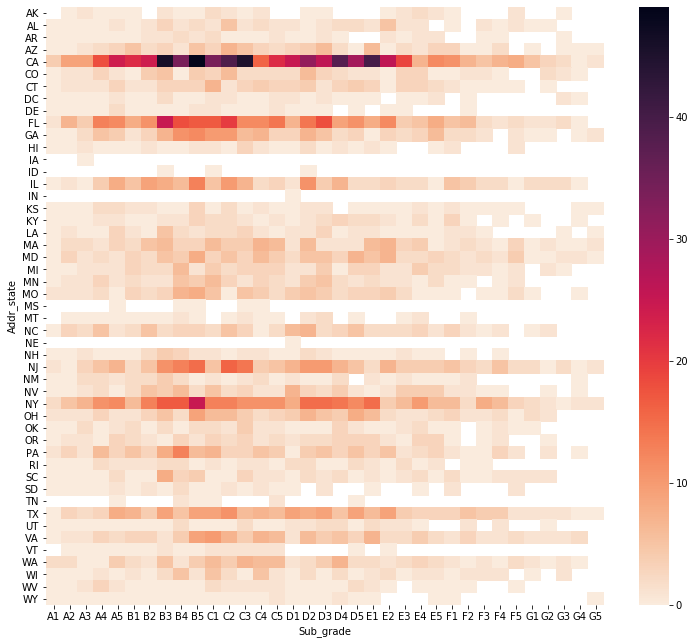

In [83]:
# Ploting Heatmap between 'Sub_grade' and 'Addr_state' for the loan dataset 
# Through this heatmap we can analyze which US state has high default rate in different sub_grades

# Creating a subset of required variables
loan_df=loan.loc[:,['loan_status','addr_state','sub_grade']]
# Initializing an empty dataframe and imputing columns using groupby on state and sub grade
dff_exp = pd.DataFrame()
dff_exp['State_sub'] = list(loan_df.groupby(['addr_state','sub_grade'])['loan_status'].agg(lambda x: sum(list(x))).index.values)
dff_exp['Count'] = list(loan_df.groupby(['addr_state','sub_grade'])['loan_status'].agg(lambda x: sum(list(x))).values)

# Separating the groupby list into state and subgrade
dff_exp['Addr_state'] = dff_exp['State_sub'].apply(lambda v: v[0])
dff_exp['Sub_grade'] = dff_exp['State_sub'].apply(lambda v: v[1])

# Using Pivot table for plotting a heatmap
loan_pvt = dff_exp.pivot("Addr_state", "Sub_grade", "Count")

# Reversing the color scale
cmap = sns.cm.rocket_r

# Ploting the heatmap
fig = plt.figure(figsize=(12.5, 11))
sns.heatmap(loan_pvt,cmap = cmap)
plt.show()

In [84]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26124 entries, 6 to 39680
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             26124 non-null  object        
 1   term                  26124 non-null  object        
 2   int_rate              26124 non-null  object        
 3   installment           26124 non-null  object        
 4   grade                 26124 non-null  object        
 5   sub_grade             26124 non-null  object        
 6   emp_title             26124 non-null  object        
 7   emp_length            26124 non-null  object        
 8   home_ownership        26124 non-null  object        
 9   annual_inc            26124 non-null  object        
 10  verification_status   26124 non-null  object        
 11  issue_d               26124 non-null  datetime64[ns]
 12  loan_status           26124 non-null  int64         
 13  purpose         

In [85]:
# Function for Calculating the difference between the maximum Default rate and minimum Default rate for each variable
def var_diff(loan_var):
    df=pd.DataFrame()
    # Imputing the Unique values of loan_var into the empty dataframe
    df[loan_var] = list(pd.unique(loan[loan_var]))
    # Calculating the default rate in percentage for each unique variable and imputing it as a column
    df['Default_rate'] = df[loan_var].apply(lambda v: round(loan[loan[loan_var]==v].loan_status.mean()*100,2))
    diff = round(df.describe().loc['max','Default_rate'] - df.describe().loc['min','Default_rate'],2)
    
    return diff

# Dropping variables which can'y be used for calculating the Default rate difference
loan_sub=loan.drop(['emp_title','issue_d','title','month','year','loan_status'],axis=1)
dff=pd.DataFrame()
dff['var_name'] = list(loan_sub.columns)
dff['DR_diff'] = dff['var_name'].apply(lambda v: var_diff(v))
dff = dff.sort_values(by = 'DR_diff', ascending=False ).reset_index().drop('index',axis=1)
dff

,var_name,DR_diff
0,sub_grade,44.98
1,pub_rec_bankruptcies,37.05
2,addr_state,28.57
3,grade,26.72
4,int_rate,18.68
5,term,14.73
6,loan_amnt,7.31
7,annual_inc,5.94
8,purpose,5.21
9,dti,4.89


In [86]:
# The driving variables for loan defaulter Identification
# Top 8 driving variable 
list(dff.var_name.values)[0:6]

['sub_grade',
 'pub_rec_bankruptcies',
 'addr_state',
 'grade',
 'int_rate',
 'term']

Above shows the default rate across all categorical variables.